In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/serge/para/1_projects/course_385/24s/github/week-14':
  os.chdir(r'/Users/serge/para/1_projects/course_385/24s/github/week-14')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/r_/wrvvnby97qz9_wm2pzw40qhh0000gn/T/ipykernel_8785/2487957780.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/zipimport.py": 1708117300.842618, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/codecs.py": 1708117300.2231953, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/abc.py": 1708117300.1248448, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/io.py": 1708117300.4300423, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/stat.py": 17081173

(20, 2)

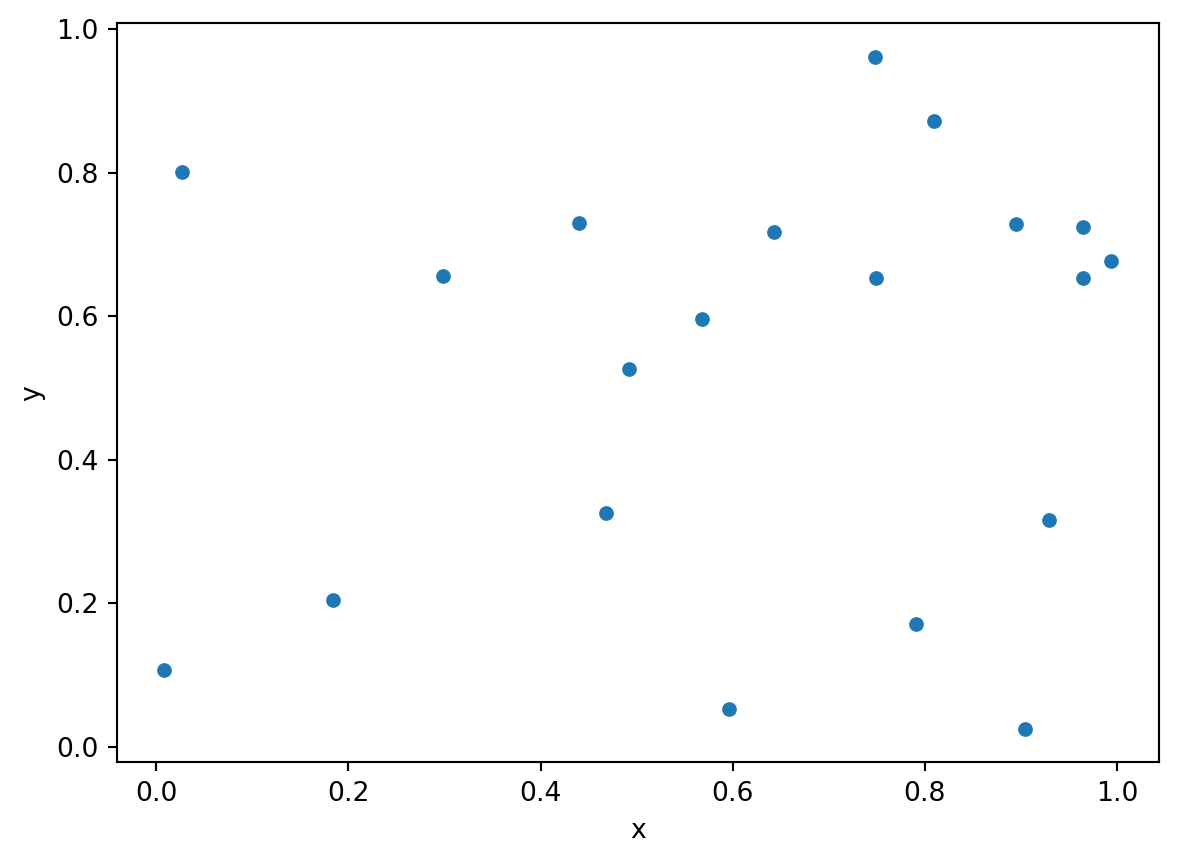

In [2]:
#| warning: false
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(12345)
xy = np.random.rand(20,2)
df = pd.DataFrame(data=xy, columns=['x','y'])
sns.scatterplot(x='x', y='y', data=df);
df.shape

(26, 2)

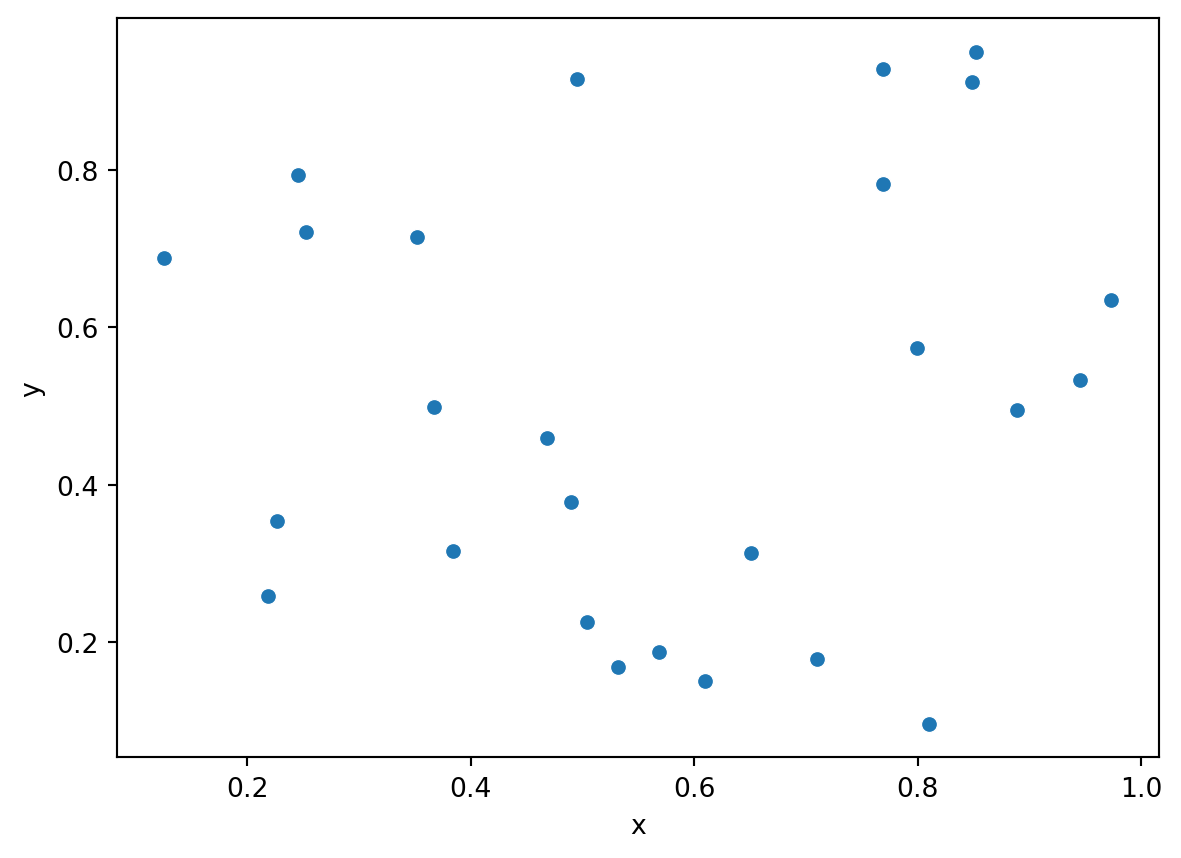

In [3]:
#| warning: false
from scipy.stats import poisson
lam=20
n = poisson.rvs(lam, 1)
xy = np.random.rand(n,2)
df = pd.DataFrame(data=xy, columns=['x','y'])
sns.scatterplot(x='x', y='y', data=df);
df.shape

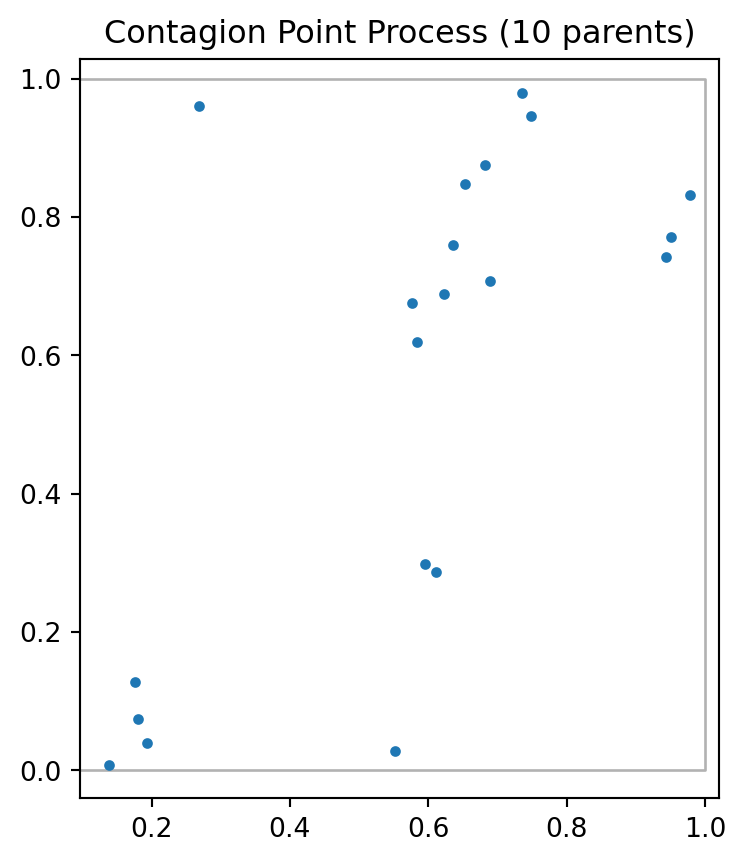

In [4]:
#| warning: false
import pointpats as pp
np.random.seed(12345)
w = pp.Window([(0,0), (0,1), (1,1), (1,0), (0,0)])
draw = pp.PoissonClusterPointProcess(w, 20, 10, 0.05, 1, asPP=True, conditioning=False)
draw.realizations[0].plot(window=True, title='Contagion Point Process (10 parents)')

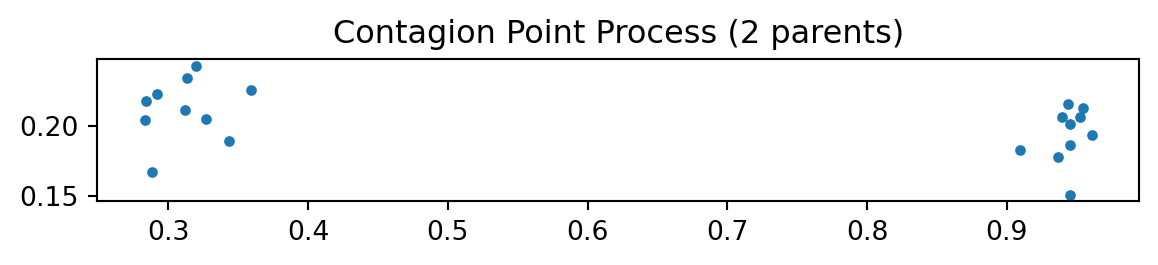

In [5]:
#| warning: false
import pointpats as pp
np.random.seed(12345)
w = pp.Window([(0,0), (0,1), (1,1), (1,0), (0,0)])
draw = pp.PoissonClusterPointProcess(w, 20, 2, 0.05, 1, asPP=True, conditioning=False)
draw.realizations[0].plot(window=True, title='Contagion Point Process (2 parents)')

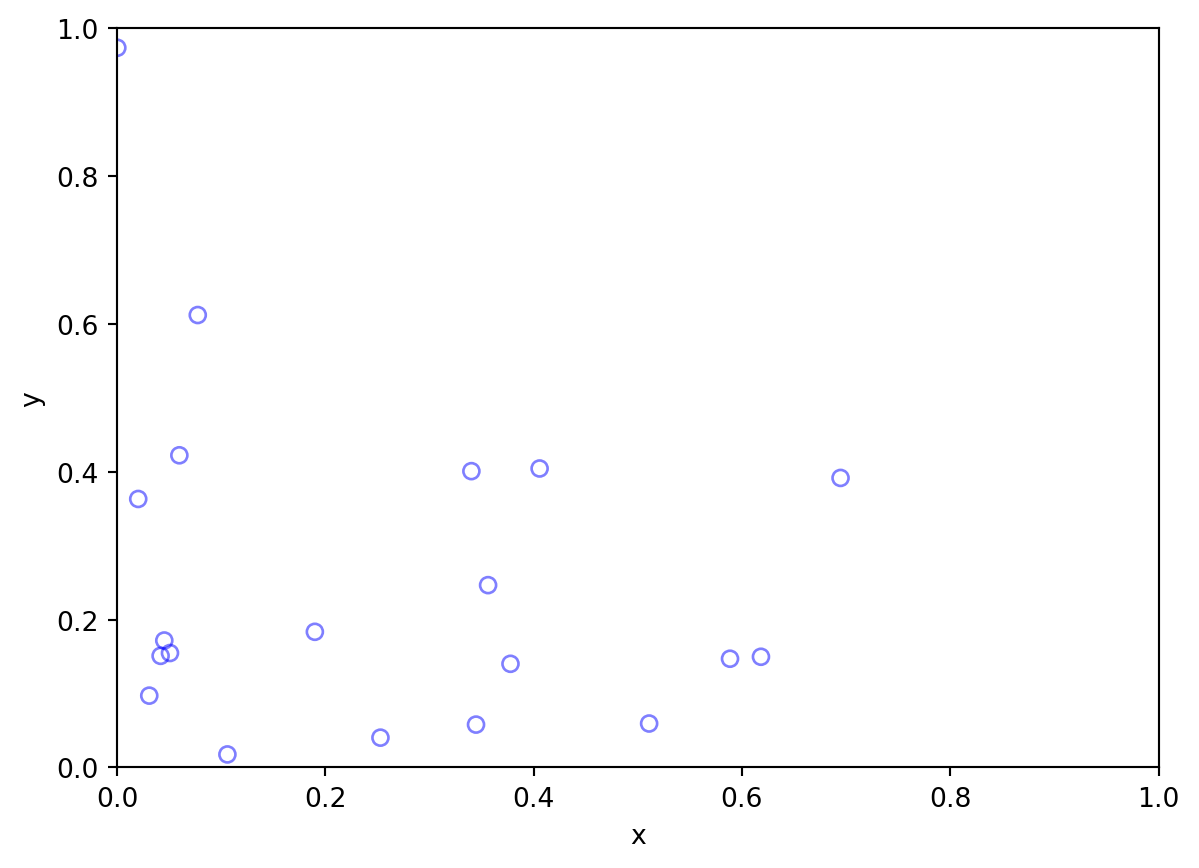

In [6]:
#| code-fold: true
#| warning: false

import numpy as np;  # NumPy package for arrays, random number generation, etc
import matplotlib.pyplot as plt  # For plotting
from scipy.optimize import minimize  # For optimizing
from scipy import integrate  # For integrating

plt.close('all');  # close all figures

# Simulation window parameters
xMin = 0;
xMax = 1;
yMin = 0;
yMax = 1;
xDelta = xMax - xMin;
yDelta = yMax - yMin;  # rectangle dimensions
areaTotal = xDelta * yDelta;

numbSim = 10 ** 3;  # number of simulations
s = 0.5;  # scale parameter
# Point process parameters
def fun_lambda(x, y):
    return 100 * np.exp(-(x ** 2 + y ** 2) / s ** 2);  # intensity function
#fun_lambda = lambda x,y: 100 * np.exp(-(x ** 2 + y ** 2) / s ** 2);

###START -- find maximum lambda -- START ###
# For an intensity function lambda, given by function fun_lambda,
# finds the maximum of lambda in a rectangular region given by
# [xMin,xMax,yMin,yMax].
def fun_Neg(x):
    return -fun_lambda(x[0], x[1]);  # negative of lambda
#fun_Neg = lambda x: -fun_lambda(x[0], x[1]);  # negative of lambda

xy0 = [(xMin + xMax) / 2, (yMin + yMax) / 2];  # initial value(ie centre)
# Find largest lambda value
resultsOpt = minimize(fun_Neg, xy0, bounds=((xMin, xMax), (yMin, yMax)));
lambdaNegMin = resultsOpt.fun;  # retrieve minimum value found by minimize
lambdaMax = -lambdaNegMin;


###END -- find maximum lambda -- END ###

# define thinning probability function
def fun_p(x, y):
    return fun_lambda(x, y) / lambdaMax;
#fun_p = lambda x, y: fun_lambda(x, y) / lambdaMax;

# for collecting statistics -- set numbSim=1 for one simulation
numbPointsRetained = np.zeros(numbSim);  # vector to record number of points
for ii in range(numbSim):
    # Simulate a Poisson point process
    numbPoints = np.random.poisson(areaTotal * lambdaMax);  # Poisson number of points
    xx = np.random.uniform(0, xDelta, ((numbPoints, 1))) + xMin;  # x coordinates of Poisson points
    yy = np.random.uniform(0, yDelta, ((numbPoints, 1))) + yMin;  # y coordinates of Poisson points

    # calculate spatially-dependent thinning probabilities
    p = fun_p(xx, yy);

    # Generate Bernoulli variables (ie coin flips) for thinning
    booleRetained = np.random.uniform(0, 1, ((numbPoints, 1))) < p;  # points to be retained

    # x/y locations of retained points
    xxRetained = xx[booleRetained];
    yyRetained = yy[booleRetained];
    numbPointsRetained[ii] = xxRetained.size;

# Plotting
plt.scatter(xxRetained, yyRetained, edgecolor='b', facecolor='none', alpha=0.5);
plt.xlabel('x');
plt.ylabel('y');
plt.xlim([xMin, xMax]);
plt.ylim([xMin, xMax]);

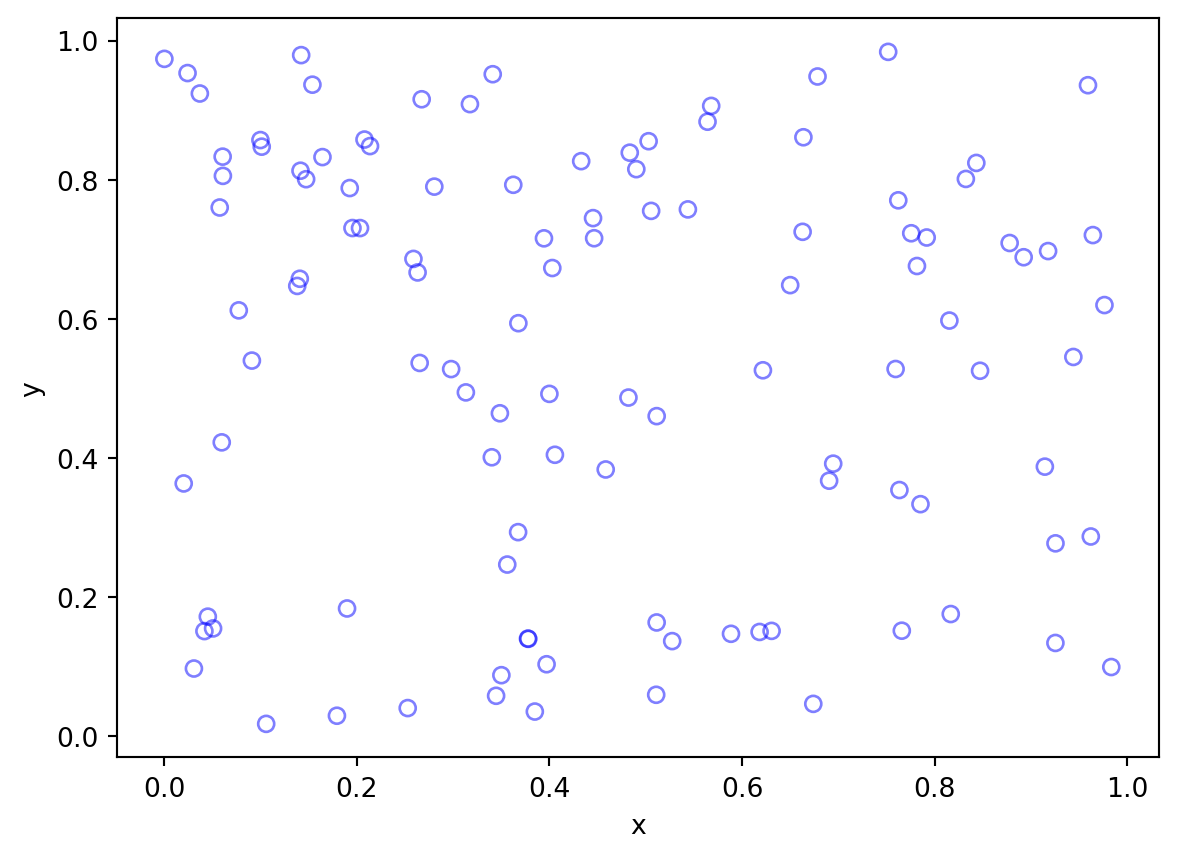

In [7]:
#| code-fold: true
#| warning: false
# Plotting
plt.scatter(xx, yy, edgecolor='b', facecolor='none', alpha=0.5);
plt.xlabel('x');
plt.ylabel('y');

In [8]:
np.random.seed(12345)
delta = 0.1
n = 20
xy = np.random.random((n,2))
xy
from scipy.spatial import distance_matrix

d = distance_matrix(xy, xy) # 20 x 20 distance matrix
d[0] # first row

array([0.        , 0.75403388, 0.4570564 , 0.33860475, 0.38256491,
       0.67009276, 0.94484483, 0.716711  , 0.56856568, 0.40881349,
       0.49326812, 0.46210886, 0.64101492, 0.36620498, 0.20105384,
       1.02432357, 0.29284635, 0.4855703 , 0.42540863, 0.41333518])

In [9]:
ijs = np.where(d<delta)
i,j = ijs
pairs = list(zip(i[i!=j], j[i!=j]))
print("The pairs within delta of one another:")
print(pairs)
drop = []

for left, right in pairs:
	if left in drop or right in drop:
		continue
	else:
		drop.append(left)
		
print("Observations to drop:")
print(drop)

The pairs within delta of one another:
[(3, 9), (3, 13), (9, 3), (9, 13), (9, 19), (13, 3), (13, 9), (19, 9)]
Observations to drop:
[3, 9]


In [10]:
import pandas as pd
df = pd.DataFrame(data=xy, columns=['x', 'y'])
df['thin'] = False
df.iloc[drop, df.columns.get_loc('thin')] = True
df.head()

,x,y,thin
0,0.929616,0.316376,False
1,0.183919,0.204560,False
2,0.567725,0.595545,False
3,0.964515,0.653177,True
4,0.748907,0.653570,False


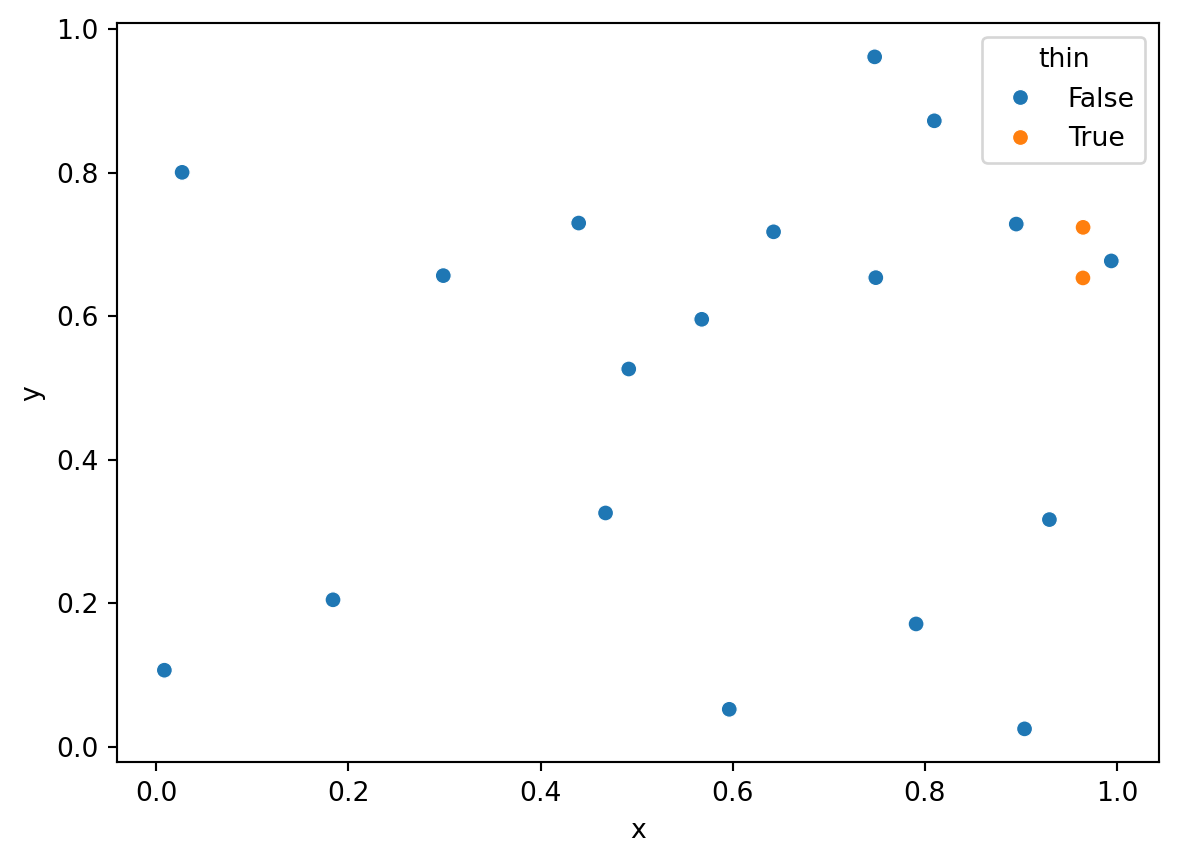

In [11]:
#| warning: false
import seaborn as sns
sns.scatterplot(x='x', y='y', hue='thin', data=df);

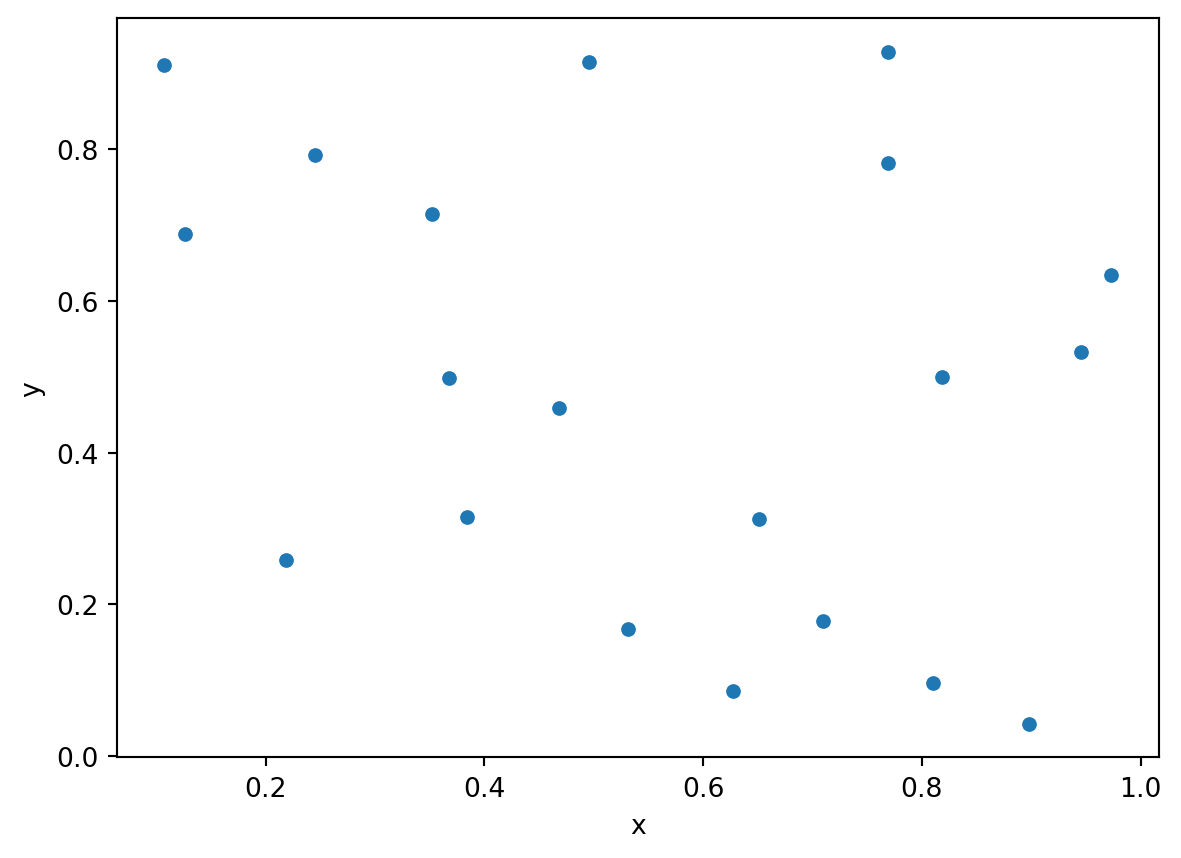

In [12]:
#| warning: false
delta = 0.1
N = 20
n = 1
xy = np.zeros((N,2))
xy[0,:] = np.random.rand(1,2)
while n < N:
	candidate = np.random.rand(1,2)
	d = distance_matrix(xy[:n,:], candidate)
	if d.min() > delta:
		xy[n,:] = candidate
		n += 1

df = pd.DataFrame(data=xy, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', data=df);

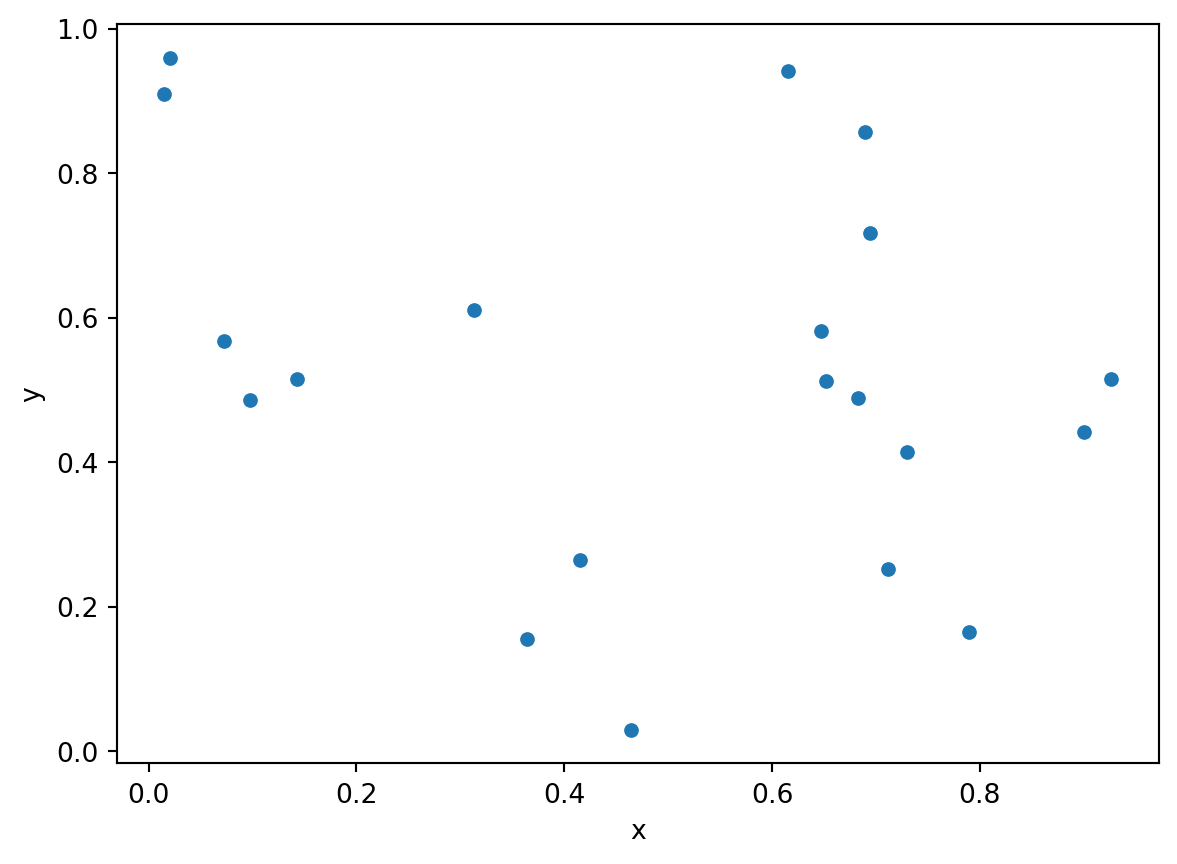

In [13]:
#| warning: false
delta = 0.1
xy = np.random.rand(20,2)
df = pd.DataFrame(data=xy, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', data=df);